This class is half-finished and is a throwaway notebook. I didnt have time to properly analyze the results from the sentence transformer

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
from scipy.stats import norm

In [ ]:

class EDA:

    def __init__(self, startups, industries):
        self.df = startups
        self.df['industry1'] = self.df.rename(columns={'industry1': 'industry'})
        self.industries = industries
        #self.TFIDF = TfidfVectorizer(stop_words='english', max_features=1000)

    def get_info(self):
        print(self.df.info())

    def get_length_distribution(self):
        self.df['description_length'] = self.df['cb_description'].apply(lambda x: len(x))
        sns.distplot(self.df['description_length'])
        plt.show()

    # What if i build a TFIDF model on each startup description and use that to update the keywords column?

    def Tfidf(self):
        keywords = self.industries['keywords'].tolist()
        return self.tfidf.fit_transform(keywords)

    def Lda(self):
        print('lda ran')
        matrix = self.Tfidf()
        topic_matrix = self.LDA.fit_transform(matrix)


    def get_new_keywords(self):

        merged = self.df.merge(self.industries, on='industry1', how='left')
        merged = merged['keywords', 'cb_description', 'industry']
        #for industry in

    def add_top_words_to_df(self, topic_matrix, top_n=10):
        top_words = []
        feature_names = self.tfidf.get_feature_names_out()
        for topic_dist in topic_matrix:
            top_topic_words = [feature_names[i] for i in topic_dist.argsort()[:-top_n - 1:-1]]
            top_words.append(", ".join(top_topic_words))
        self.data['top_words'] = top_words
        return self.data

    def get_number_labels(self):
        return self.df['industry1'].value_counts().to_dict()





In [36]:
def update_industry_keywords(df, industries_df, num_topics=5, num_keywords=5):
    industries_df['updated_keywords'] = None

    merged = pd.merge(df, industries, left_on='industry1', right_on='industry', how='left')
    merged = merged[['keywords', 'cb_description', 'industry']]

    vectorizer = TfidfVectorizer(stop_words='english')

    for industry in merged['industry'].unique():
        industry_descriptions = merged[merged['industry'] == industry]['cb_description']
        tfidf_matrix = vectorizer.fit_transform(industry_descriptions)

        lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
        lda.fit(tfidf_matrix)

        keywords = []
        for x, topic_keywords_idx in lda.components_.argsort(axis=1)[:, -num_keywords:]:
            keywords.extend([vectorizer.get_feature_names()[idx] for idx in topic_keywords_idx])

        industries_df.loc[industries_df['name'] == industry, 'updated_keywords'] = ', '.join(set(keywords))

    return industries_df

industries = pd.read_csv(r'C:\Users\imran\DataspellProjects\WalidCase\data\processed\industries_clean.csv', sep='\t')
startups = pd.read_csv(r'C:\Users\imran\DataspellProjects\WalidCase\data\tagged\tagged_with_sentence_transformer.csv')

# = startups.rename(columns={'industry1': 'industry'})
merged = pd.merge(startups, industries, left_on='industry1', right_on='industry', how='left')
merged = merged[['keywords', 'cb_description', 'industry']]
tfidf = TfidfVectorizer(
    max_features=1000,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    stop_words='english',
    ngram_range=(1, 2),
    use_idf=True,
    smooth_idf=True,
    sublinear_tf=False
)

lda = LatentDirichletAllocation(n_components=10, random_state=42)
for industry in merged['industry'].unique():
    industry_descriptions = merged[merged['industry'] == industry]['cb_description'].tolist()
    tfidf_matrix = tfidf.fit_transform(industry_descriptions)
    topic_matrix = lda.fit_transform(tfidf_matrix)




ValueError: empty vocabulary; perhaps the documents only contain stop words

In [20]:
startups = pd.read_csv(r'C:\Users\imran\DataspellProjects\WalidCase\data\tagged\clustered_with_spacy_engineering\nouns_only_1k_startups_4_clusters.csv')

# keep only industries with value counts between 5 and 20
industry_counts = startups['industry1'].value_counts().reset_index()
industry_counts.columns = ['industry', 'count']
industry_counts = industry_counts[industry_counts['count'] > 5]
industry_counts = industry_counts[industry_counts['count'] < 30]
startups = startups[startups['industry1'].isin(industry_counts['industry'].tolist())]


def plot_industry_histogram(data, industry_col):
    industry_counts = data[industry_col].value_counts().reset_index()
    industry_counts.columns = ['industry', 'count']
    #remove healthcare, procurement and sales crm because they are outliers
    data = data[data['industry1'] != 'Sales & CRM']
    data = data[data['industry1'] != 'Procurement']
    data = data[data['industry1'] != 'Healthcare']

    plt.figure(figsize=(16, 8))
    sns.barplot(x='industry', y='count', data=industry_counts, palette='viridis')
    plt.xticks(rotation=90)
    plt.xlabel('Industry')
    plt.ylabel('Count')
    plt.title('Industry Counts')
    plt.show()

    plt.figure(figsize=(16, 8))
    sns.distplot(industry_counts['count'], hist=False, kde=False, fit=norm, color='blue')
    plt.xlabel('Count')
    plt.ylabel('Density')
    plt.title('Normal Distribution of Industry Counts')
    plt.show()



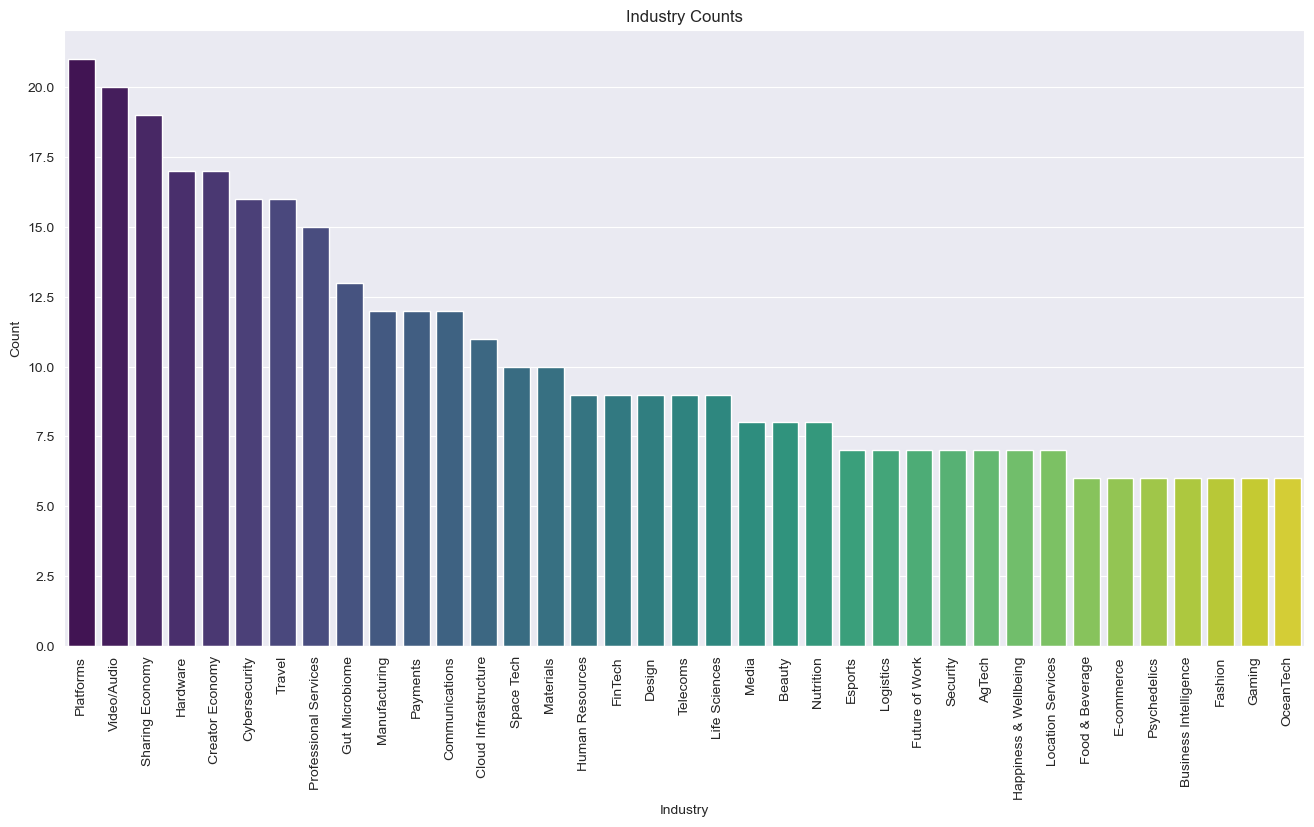

C:\Users\imran\AppData\Local\Temp\ipykernel_22532\3479570052.py:28: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(industry_counts['count'], hist=False, kde=False, fit=norm, color='blue')


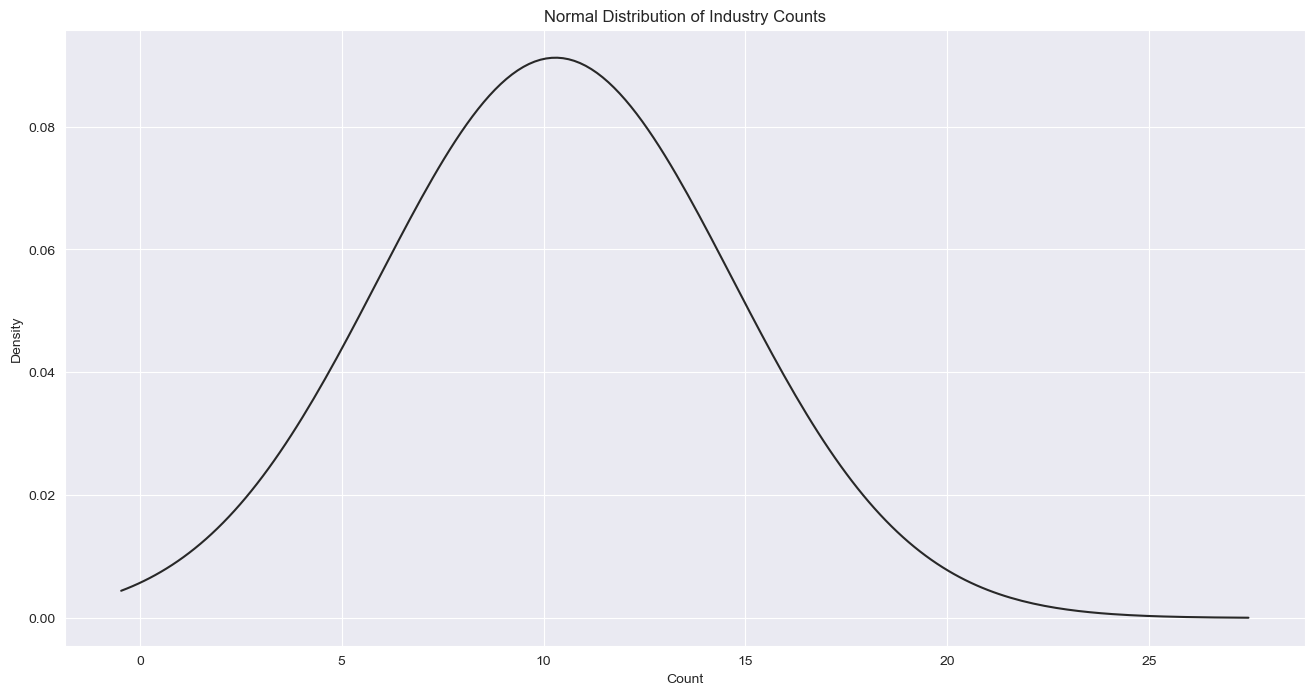

In [21]:
plot_industry_histogram(startups, 'industry1')